In [139]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler
from scipy import stats

%matplotlib inline

### Glossary of Terms For Kaggle Data Set

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

### Reading in the Training Data

In [74]:
train = pd.read_csv('data/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [75]:
test = pd.read_csv('data/test.csv')
test.shape

(1459, 80)

In [76]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [77]:
train.describe()
train.shape

(1460, 81)

In [78]:
train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Taking a look at Missing Values

In [79]:
train_isNull = train.isnull().sum().sort_values(ascending=False)
train_isNull.sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofStyle          0
dtype: int64

In [80]:
test.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64

### Dropping the Columns

In [81]:
train.drop(['PoolQC', 'MiscFeature','Alley','Fence'], axis=1,inplace=True)
train.shape

(1460, 77)

In [82]:
test.drop(['PoolQC', 'MiscFeature','Alley','Fence'], axis=1,inplace=True)
test.shape

(1459, 76)

### EDA

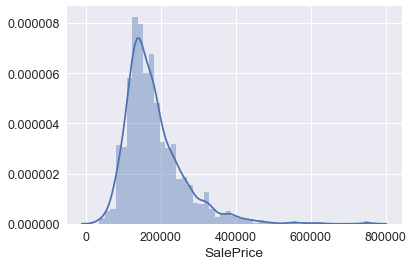

In [83]:
sns.distplot(train['SalePrice'])

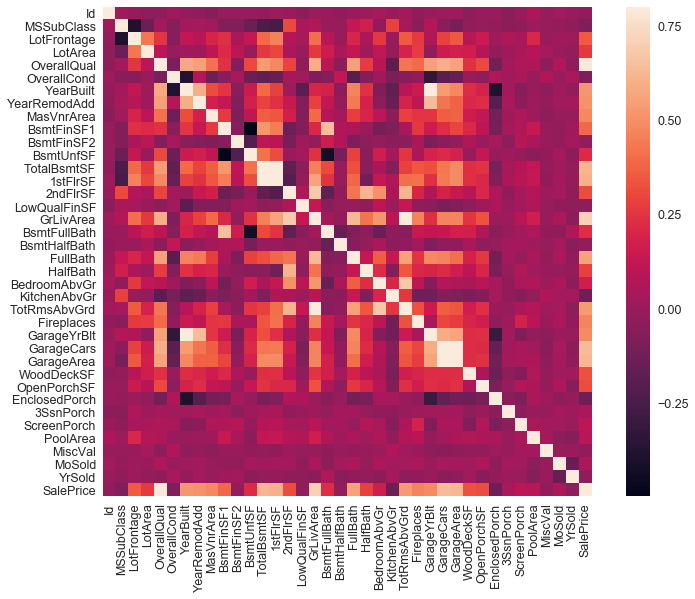

In [84]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

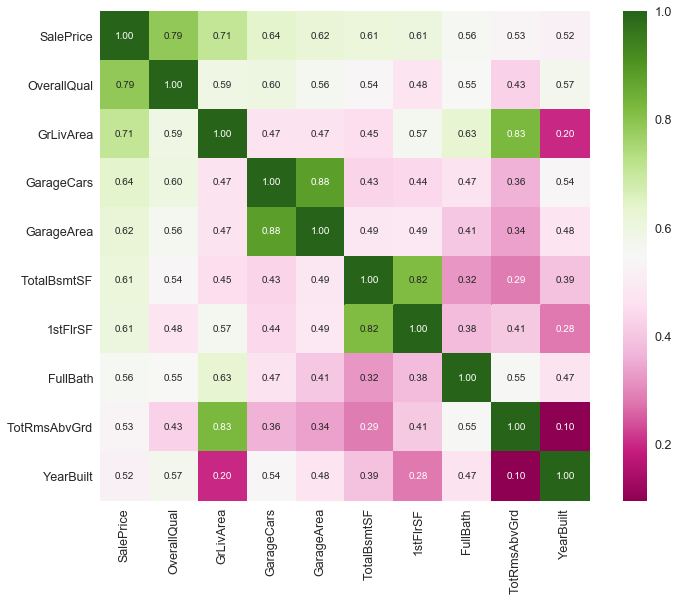

In [85]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cmap="PiYG", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

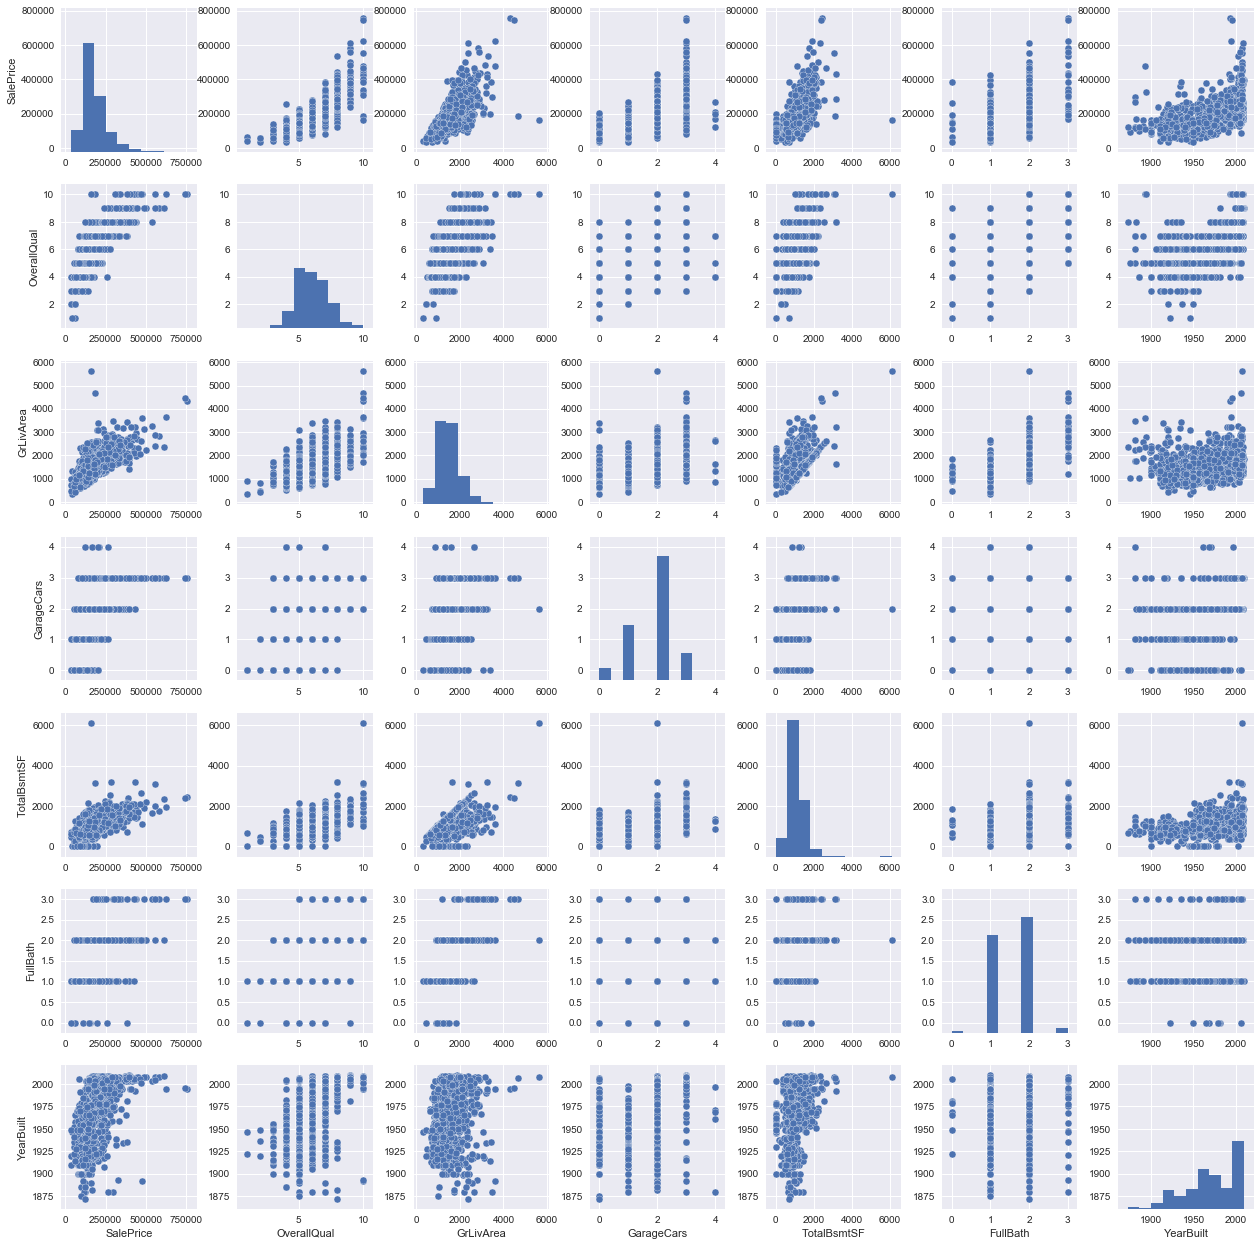

In [86]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

### Filling in the Missing Values

In [87]:
train.isnull().sum().sort_values(ascending=False).head(20)


FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
MasVnrArea        8
Electrical        1
RoofMatl          0
RoofStyle         0
SalePrice         0
Exterior1st       0
Exterior2nd       0
dtype: int64

In [88]:
train.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [89]:
FireplaceQu = Counter(train.FireplaceQu)
FireplaceQu.most_common(10)

[(nan, 690), ('Gd', 380), ('TA', 313), ('Fa', 33), ('Ex', 24), ('Po', 20)]

In [90]:
train.FireplaceQu.fillna('NA',inplace=True)

In [91]:
test.FireplaceQu.fillna('NA',inplace=True)

In [92]:
Counter(train.LotFrontage).most_common(5)

[(60.0, 143), (70.0, 70), (80.0, 69), (50.0, 57), (75.0, 53)]

In [93]:
train.LotFrontage.fillna(np.mean, inplace=True)

In [94]:
test.LotFrontage.fillna(np.mean, inplace=True)

In [95]:
Counter(train.GarageType).most_common(10)

[('Attchd', 870),
 ('Detchd', 387),
 ('BuiltIn', 88),
 (nan, 81),
 ('Basment', 19),
 ('CarPort', 9),
 ('2Types', 6)]

In [96]:
train.GarageType.fillna('NA',inplace=True)
train.GarageYrBlt.fillna('NA',inplace=True)
train.GarageFinish.fillna('NA',inplace=True)
train.GarageCond.fillna('NA',inplace=True)
train.GarageQual.fillna('NA',inplace=True)

In [97]:
test.GarageType.fillna('NA',inplace=True)
test.GarageYrBlt.fillna('NA',inplace=True)
test.GarageFinish.fillna('NA',inplace=True)
test.GarageCond.fillna('NA',inplace=True)
test.GarageQual.fillna('NA',inplace=True)

In [98]:
Counter(train.BsmtFinType2).most_common(10)

[('Unf', 1256),
 ('Rec', 54),
 ('LwQ', 46),
 (nan, 38),
 ('BLQ', 33),
 ('ALQ', 19),
 ('GLQ', 14)]

In [99]:
train.BsmtFinType2.fillna('Unf',inplace=True)

In [100]:
test.BsmtFinType2.fillna('Unf',inplace=True)

In [101]:
Counter(train.BsmtExposure).most_common(10)

[('No', 953), ('Av', 221), ('Gd', 134), ('Mn', 114), (nan, 38)]

In [102]:
train.BsmtExposure.fillna('No', inplace=True)

In [103]:
test.BsmtExposure.fillna('No', inplace=True)

In [104]:
Counter(train.BsmtQual).most_common(10)

[('TA', 649), ('Gd', 618), ('Ex', 121), (nan, 37), ('Fa', 35)]

In [105]:
train.BsmtQual.fillna('TA', inplace=True)

In [106]:
test.BsmtQual.fillna('TA', inplace=True)

In [107]:
Counter(train.BsmtFinType1).most_common(10)

[('Unf', 430),
 ('GLQ', 418),
 ('ALQ', 220),
 ('BLQ', 148),
 ('Rec', 133),
 ('LwQ', 74),
 (nan, 37)]

In [108]:
train.BsmtFinType1.fillna('Unf',inplace=True)

In [109]:
test.BsmtFinType1.fillna('Unf',inplace=True)

In [110]:
Counter(train.BsmtCond).most_common(10)

[('TA', 1311), ('Gd', 65), ('Fa', 45), (nan, 37), ('Po', 2)]

In [111]:
train.BsmtCond.fillna('TA',inplace=True)

In [112]:
test.BsmtCond.fillna('TA',inplace=True)

In [113]:
Counter(train.MasVnrType).most_common(10)

[('None', 864), ('BrkFace', 445), ('Stone', 128), ('BrkCmn', 15), (nan, 8)]

In [114]:
train.MasVnrType.fillna('None', inplace=True)

In [115]:
test.MasVnrType.fillna('None', inplace=True)

In [116]:
Counter(train.MasVnrArea).most_common(10)

[(0.0, 861),
 (180.0, 8),
 (108.0, 8),
 (72.0, 8),
 (120.0, 7),
 (16.0, 7),
 (200.0, 6),
 (340.0, 6),
 (106.0, 6),
 (80.0, 6)]

In [117]:
train.MasVnrArea.fillna(0.0,inplace=True)

In [118]:
test.MasVnrArea.fillna(0.0,inplace=True)

In [119]:
Counter(train.Electrical).most_common(10)

[('SBrkr', 1334),
 ('FuseA', 94),
 ('FuseF', 27),
 ('FuseP', 3),
 ('Mix', 1),
 (nan, 1)]

In [120]:
train.Electrical.fillna('SBrkr',inplace=True)

In [121]:
test.Electrical.fillna('SBrkr',inplace=True)

In [122]:
# test.dropna(how='any',inplace=True) 

In [123]:
test.shape   #isnull().sum().sort_values(ascending=False).head(20)

(1459, 76)

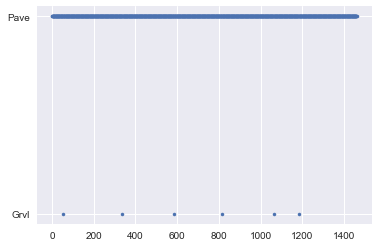

In [124]:
plt.plot(train.Id , train.Street,  marker = '.', linestyle = 'none')
plt.show()

### Checking to see Missing Values

In [125]:
train.isnull().sum().sort_values(ascending=False).head()

SalePrice      0
ExterCond      0
RoofStyle      0
RoofMatl       0
Exterior1st    0
dtype: int64

In [126]:
train.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Models To Run

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [128]:
train = train._get_numeric_data()
test = test._get_numeric_data()
train.to_csv('data/train_numeric.csv')
test.to_csv('data/test_numeric.csv')
X_train = train.drop('SalePrice', axis=1)
y_train = train.SalePrice
X_test = test
# print(train)

In [129]:
# from sklearn import preprocessing
# X_scaled = preprocessing.scale(X)

In [130]:
test.isnull().sum().sort_values(ascending=False).head(20)

BsmtHalfBath    2
BsmtFullBath    2
GarageCars      1
BsmtFinSF1      1
TotalBsmtSF     1
BsmtUnfSF       1
BsmtFinSF2      1
GarageArea      1
MasVnrArea      0
GrLivArea       0
LotArea         0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
OverallQual     0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
MSSubClass      0
YrSold          0
dtype: int64

In [131]:
test.BsmtHalfBath.fillna(0,inplace=True)
test.BsmtFullBath.fillna(0,inplace=True)
test.GarageCars.fillna(0,inplace=True)
test.BsmtFinSF1.fillna(0,inplace=True)
test.TotalBsmtSF.fillna(0,inplace=True)
test.BsmtUnfSF.fillna(0,inplace=True)
test.BsmtFinSF2.fillna(0,inplace=True)
test.GarageArea.fillna(0,inplace=True)


In [132]:
#train a model
linear_model = LinearRegression().fit(X_train,y_train)

#predict on training set
predicted_y = linear_model.predict(X_test) 
print(len(predicted_y))

1459


In [133]:
df_submission = test
df_submission['SalePrice'] = predicted_y
df_submission = df_submission[['Id','SalePrice']]
# df_submission.head()
df_submission.to_csv('data/linear_submission.csv',index=False)

In [134]:
len(predicted_y)

1459

In [135]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.datasets import make_regression

### Log Values for Numeric Variables

In [153]:
trainLog = pd.read_csv('data/train_numeric.csv')
testLog = pd.read_csv('data/test_numeric.csv')
trainLog.isnull().sum().sort_values(ascending=False).head(20)
testLog.isnull().sum().sort_values(ascending=False).head(20)


BsmtFullBath    2
BsmtHalfBath    2
GarageCars      1
TotalBsmtSF     1
BsmtUnfSF       1
BsmtFinSF2      1
BsmtFinSF1      1
GarageArea      1
YearRemodAdd    0
LowQualFinSF    0
YearBuilt       0
MasVnrArea      0
OverallCond     0
OverallQual     0
LotArea         0
MSSubClass      0
1stFlrSF        0
Id              0
2ndFlrSF        0
YrSold          0
dtype: int64

In [154]:
testLog.BsmtHalfBath.fillna(0,inplace=True)
testLog.BsmtFullBath.fillna(0,inplace=True)
testLog.GarageCars.fillna(0,inplace=True)
testLog.BsmtFinSF1.fillna(0,inplace=True)
testLog.TotalBsmtSF.fillna(0,inplace=True)
testLog.BsmtUnfSF.fillna(0,inplace=True)
testLog.BsmtFinSF2.fillna(0,inplace=True)
testLog.GarageArea.fillna(0,inplace=True)

In [155]:
trainLog = trainLog.apply(np.log)
testLog = testLog.apply(np.log)
testLog.isnull().sum().sort_values(ascending=False).head(20)

YrSold          0
MoSold          0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtUnfSF       0
BsmtFinSF2      0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
OverallQual     0
LotArea         0
MSSubClass      0
Id              0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

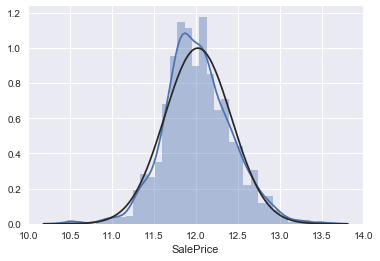

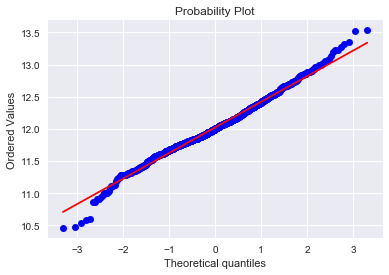

In [156]:
sns.distplot(trainLog['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(trainLog['SalePrice'], plot=plt)

In [157]:
X_trainLog = trainLog.drop('SalePrice', axis=1)
y_trainLog = trainLog.SalePrice
X_test_log = testLog

In [159]:
X_trainLog.isnull().sum().sort_values(ascending=False).head(20)

YrSold          0
MoSold          0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtUnfSF       0
BsmtFinSF2      0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
OverallQual     0
LotArea         0
MSSubClass      0
Id              0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [166]:
# X_trainLog.replace(-inf, 0)
# X_trainLog

NameError: name 'inf' is not defined

In [163]:
#train a model
log_linear_model = LinearRegression().fit(X_trainLog,y_trainLog)

#predict on training set
log_predicted_y = log_linear_model.predict(X_test_log) 
# print(len(log_predicted_y))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').